# Cursos de Series de tiempo con *Machine Learning*
## Modulo 20. Modelo de Regresion Lineal
                        Elaborado por: Naren Castellon

# **Contenido**

1. Introducción
2. Idea detrás del modelo de Regresión
3. Definición del Modelo
4. Caso de estudio: Forecasting de los Niveles de CO2
5. Cargando librerias y datos
6. Análisis Exploratorio de Datos
7. Modelando con MLForecast
8. Evaluar el rendimiento del modelo.
9.


# **Introducción**

Introducción:

El análisis de series de tiempo es una técnica ampliamente utilizada en diversos campos, como la economía, la meteorología, las finanzas y la ciencia de datos. Consiste en el estudio y la predicción de datos secuenciales, donde el tiempo juega un papel fundamental. En este contexto, el modelo de regresión lineal se convierte en una herramienta importante para comprender las relaciones y tendencias presentes en los datos de series de tiempo.

El modelo de regresión lineal es una técnica estadística que busca establecer una relación lineal entre una variable dependiente y una o más variables independientes. En el contexto de las series de tiempo, este modelo permite predecir el comportamiento futuro de una variable dependiente en función de su historia y otras variables explicativas relevantes.

El modelo de regresión lineal con series de tiempo se basa en la suposición de que existen patrones y relaciones lineales entre las variables a lo largo del tiempo. A través de este enfoque, se pueden identificar tendencias, estacionalidad, ciclos y otros patrones que ayudan a comprender y predecir el comportamiento de la serie de tiempo en estudio.

Sin embargo, es importante destacar que el modelo de regresión lineal tradicional tiene ciertas limitaciones cuando se aplica a series de tiempo. Uno de los principales desafíos es que las observaciones en una serie de tiempo pueden estar autocorrelacionadas, es decir, que una observación puede depender de las observaciones anteriores. Además, pueden existir otros factores que afecten el comportamiento de la serie de tiempo y que no se tengan en cuenta en el modelo lineal básico.

A pesar de estas limitaciones, el modelo de regresión lineal sigue siendo una técnica valiosa en el análisis de series de tiempo, especialmente cuando se trata de identificar y cuantificar tendencias a largo plazo. Además, puede servir como punto de partida para técnicas más avanzadas, como el modelo de regresión lineal autoregresivo (AR) o el modelo de regresión lineal autorregresivo de media móvil (ARMA), que abordan de manera más adecuada la autocorrelación y otros patrones presentes en las series de tiempo.

En resumen, el modelo de regresión lineal es una herramienta esencial en el análisis de series de tiempo, permitiendo explorar y cuantificar las relaciones lineales entre variables a lo largo del tiempo. Aunque tiene sus limitaciones, proporciona una base sólida para comprender y predecir el comportamiento de las series de tiempo, y puede ser complementado con técnicas más avanzadas para abordar las características particulares de los datos secuenciales.

## La idea detrás de la regresión lineal

La regresión lineal es una técnica estadística utilizada para modelar la relación entre una variable dependiente y una o más variables independientes. Su idea básica es establecer una función lineal que mejor se ajuste a los datos observados, permitiendo predecir o estimar el valor de la variable dependiente en función de los valores de las variables independientes.

En la regresión lineal, se busca encontrar la línea recta que minimice la distancia entre los puntos observados y los valores predichos por el modelo. Esta línea recta se define mediante una ecuación de la forma y = mx + b, donde "y" representa la variable dependiente, "x" la variable independiente, "m" la pendiente de la línea y "b" la intersección con el eje y.

El proceso de ajuste del modelo de regresión lineal implica estimar los valores de los coeficientes "m" y "b" a partir de los datos de entrenamiento. Esto se logra utilizando métodos estadísticos, como el método de mínimos cuadrados, que encuentra los valores de los coeficientes que minimizan la suma de los cuadrados de las diferencias entre los valores observados y los valores predichos por el modelo.

Una vez que se ha ajustado el modelo, se pueden realizar predicciones o estimaciones sobre nuevos datos utilizando la ecuación de regresión lineal. Además, se pueden evaluar la calidad del ajuste y la significancia de los coeficientes utilizando estadísticas como el coeficiente de determinación (R²) y las pruebas de hipótesis.

La regresión lineal es ampliamente utilizada en diversos campos, desde las ciencias sociales hasta la ingeniería, debido a su simplicidad y a la interpretación intuitiva de los coeficientes. Sin embargo, es importante tener en cuenta sus supuestos, como la linealidad y la independencia de los errores, así como explorar la presencia de otros modelos más complejos cuando la relación entre las variables no es lineal.


## Definición del modelo
La regresión lineal se define de la siguiente manera:

$$y=\beta_0+\beta_1 x_1+\beta_2 x_2+\cdots+\beta_p x_p+\epsilon $$

En esta fórmula
* Existen $p$ variables explicativas, denominadas $x$.
* Hay una variable objetivo llamada $y$.
* El valor de $y$ se calcula como una constante ($\beta_0$) más los valores de las variables $x$ multiplicados por sus coeficientes $\beta_1$ a $\beta_p$.

La siguiente figura se muestra cómo interpretar $\beta_0$ y $\beta_1$ visualmente. Muestra que para un aumento de 1 en la variable $x$, el aumento en la variable y representa $\beta_1$. $\beta_0$ es el valor de y cuando $x$ es 0.

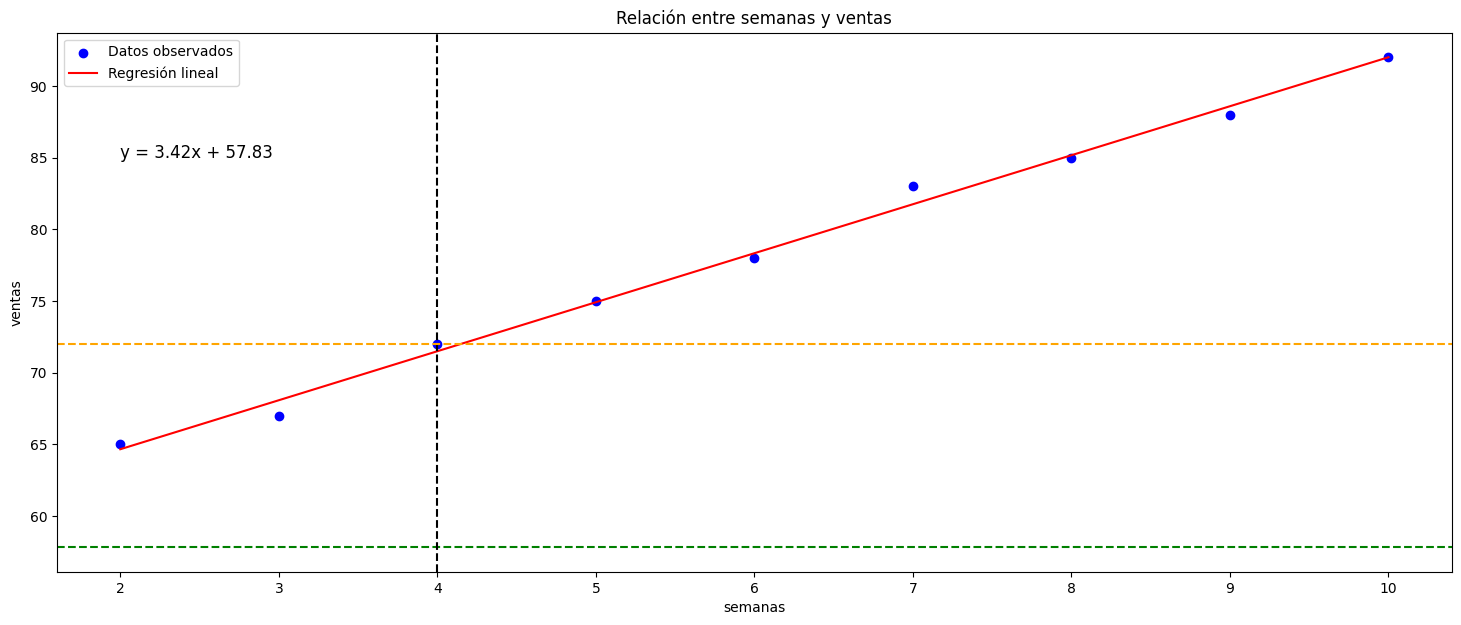

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the plot size
# ==============================================================================
from pylab import rcParams
rcParams['figure.figsize'] = (18,7)

# Datos de ejemplo
semanas = [2, 3, 4, 5, 6, 7, 8, 9, 10]
ventas = [65, 67, 72, 75, 78, 83, 85, 88, 92]

# Ajuste de la regresión lineal
coeficientes = np.polyfit(semanas, ventas, 1)
linea_regresion = np.poly1d(coeficientes)

# Ecuación del modelo
ecuacion_modelo = f"y = {coeficientes[0]:.2f}x + {coeficientes[1]:.2f}"

# Punto de interés
punto_interes = (4, 72)

# Creación del gráfico de dispersión y regresión lineal
plt.scatter(semanas, ventas, color='blue', label='Datos observados')
plt.plot(semanas, linea_regresion(semanas), color='red', label='Regresión lineal')
plt.xlabel('semanas')
plt.ylabel('ventas')
plt.title('Relación entre semanas y ventas')
plt.legend()

# Mostrar la ecuación y el punto de interés en el gráfico
plt.text(2, 85, ecuacion_modelo, fontsize=12)  # Posición del texto (ajustar según tus datos)
plt.axhline(coeficientes[1], color='green', linestyle='--', label='Intercepto')  # Línea punteada para el intercepto
plt.plot([punto_interes[0], punto_interes[0]], [punto_interes[1], linea_regresion(punto_interes[0])], '--', color='purple', label='Punto de interés')

# Trazar las líneas verticales y horizontales
plt.axvline(punto_interes[0], color='black', linestyle='--', label='x=4')
plt.axhline(punto_interes[1], color='orange', linestyle='--', label='y=72')

# Mostrar el gráfico
plt.show()

Para poder usar la regresión lineal, debe estimar los coeficientes (betas) en un conjunto de datos de entrenamiento. Luego, los coeficientes se pueden estimar utilizando la siguiente fórmula, en notación matricial:

$$\hat \beta=(X^T X)^{-1} X^T y $$

Esta fórmula se conoce como MCO: el método de los mínimos cuadrados ordinarios. Este modelo es muy rápido de ajustar, ya que solo requiere cálculos matriciales para calcular las betas. Aunque es fácil de instalar, es menos adecuado para procesos más complejos. Después de todo, es un modelo lineal y, por lo tanto, solo puede ajustarse a procesos lineales.

Un modelo lineal puede ajustarse a cualquier tipo de relación que vaya en una dirección. Un ejemplo de esto es “si sube la temperatura, bajan las ventas de chocolate caliente”. Sin embargo, los modelos lineales no pueden adaptarse a nada no lineal. Un ejemplo de un proceso no lineal es este: “si la temperatura está bajo cero, las ventas de chocolate caliente son bajas; si la temperatura está entre cero y 10, las ventas de chocolate caliente son altas; si la temperatura es alta, las ventas de chocolate caliente son bajas”.

Como puede ver, el segundo ejemplo no es lineal porque no se podría trazar una línea recta desde las ventas bajas hasta las altas de chocolate caliente. Más bien, podría hacer mejor una declaración if/else para capturar esta lógica.

Debe tener en cuenta que los modelos lineales no son muy buenos para capturar tendencias no lineales. Sin embargo, los modelos no lineales, cuando se ajustan correctamente, a menudo pueden aproximarse bastante bien a las tendencias lineales. Esta es la razón por la que muchas de las técnicas de aprendizaje automático más avanzadas utilizan muchos enfoques no lineales. Verá esto a lo largo de los siguientes capítulos.

## Caso de estudio: Pronosticar los niveles de CO2


Introducción:
El aumento en los niveles de dióxido de carbono (CO2) en la atmósfera es una preocupación global debido a su impacto en el cambio climático. En este caso de estudio, vamos a utilizar un modelo de regresión lineal para predecir los niveles futuros de CO2 basados en datos históricos.

Objetivo:
El objetivo principal de este caso de estudio es desarrollar un modelo de regresión lineal que pueda predecir los niveles de CO2 en la atmósfera para períodos futuros. Utilizaremos datos históricos de CO2 para ajustar el modelo y luego utilizaremos el modelo para hacer pronósticos a corto plazo.

Datos:
Para este caso de estudio, necesitaremos datos históricos de los niveles de CO2 en la atmósfera. Estos datos pueden ser obtenidos de fuentes confiables como el Sistema de Monitoreo Global de CO2 de la Administración Nacional Oceánica y Atmosférica (NOAA) o la Organización Meteorológica Mundial (OMM). Los datos deben incluir mediciones regulares de los niveles de CO2 en diferentes puntos en el tiempo.

Metodología:
1. Recopilar los datos históricos de CO2: Obtén los datos históricos de CO2 de una fuente confiable. Asegúrate de tener mediciones regulares en diferentes puntos en el tiempo para obtener un conjunto de datos significativo.

2. Preparar los datos: Organiza los datos en una estructura adecuada, asegurándote de tener una columna para las fechas y otra columna para los niveles de CO2. Realiza cualquier manipulación o limpieza de datos necesaria, como eliminar valores atípicos o llenar los valores faltantes.

3. Dividir los datos en conjuntos de entrenamiento y prueba: Separa los datos en conjuntos de entrenamiento y prueba. El conjunto de entrenamiento se utilizará para ajustar el modelo de regresión lineal, mientras que el conjunto de prueba se utilizará para evaluar el rendimiento del modelo.

4. Ajustar el modelo de regresión lineal: Utiliza el conjunto de entrenamiento para ajustar el modelo de regresión lineal. La variable independiente será el tiempo (representado por un número entero o decimal que representa los años, meses o días transcurridos) y la variable dependiente será el nivel de CO2.

5. Evaluar el rendimiento del modelo: Utiliza el conjunto de prueba para evaluar el rendimiento del modelo de regresión lineal. Calcula métricas como el error cuadrático medio (RMSE) o el coeficiente de determinación (R2) para medir qué tan bien se ajusta el modelo a los datos de prueba.

6. Realizar pronósticos: Utiliza el modelo de regresión lineal ajustado para hacer pronósticos de los niveles futuros de CO2. Puedes utilizar los valores futuros de tiempo (por ejemplo, los próximos meses o años) para generar pronósticos.

7. Evaluar los pronósticos: Compara los pronósticos generados por el modelo con los valores reales de CO2 en períodos futuros (si están disponibles) para evaluar la precisión de las predicciones.

8. Refinar y mejorar el modelo: Si los pronósticos no son precisos, puedes intentar mejorar el modelo de regresión lineal realizando ajustes adicionales, como incluir variables predictoras adicionales o utilizar técnicas avanzadas de regresión.

Conclusiones:
En este caso de estudio, hemos utilizado un modelo de regresión lineal para predecir los niveles futuros de CO2 en la atmósfera. El modelo ajustado proporciona una aproximación útil para comprender las tendencias y cambios en los niveles de CO2 a lo largo del tiempo. Sin embargo, es importante tener en cuenta que el modelo de regresión lineal tiene sus limitaciones y puede no capturar factores complejos que influyen en los niveles de CO2. Por lo tanto, es fundamental realizar un análisis adicional y considerar otros factores relevantes para obtener una comprensión completa y precisa de los cambios en los niveles de CO2.

# **Cargando librerias y Datos**

In [2]:
# Handling and processing of Data
# ==============================================================================
import numpy as np
import pandas as pd

import scipy.stats as stats

# Sklearn model y metricas
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Statsmodels 
# ==============================================================================
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

# StatsForecast y Mlforecast
# ==============================================================================
from mlforecast import MLForecast
from statsforecast import StatsForecast
from utilsforecast.plotting import plot_series
from mlforecast.target_transforms import Differences
from mlforecast.utils import PredictionIntervals

# Hide warnings
# ==============================================================================
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

/Users/user/Documents/miniconda3/envs/myenv/lib/python3.10/site-packages/statsforecast/core.py:26: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
/Users/user/Documents/miniconda3/envs/myenv/lib/python3.10/site-packages/statsforecast/utils.py:237: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "ds": pd.date_range(start="1949-01-01", periods=len(AirPassengers), freq="M"),


In [3]:
# Plot
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import seaborn as sns
plt.style.use('grayscale') # fivethirtyeight  grayscale  classic
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#6495ED', #  '#212946'  ,  '#99FFDE', '#ffde99', '#de99ff' , #212946  '#99FFDE', '#ffde99', '#de99ff'  'coral','#FFDAB9','yellowgreen','#6495ED'
    'axes.facecolor': '#6495ED',
    'savefig.facecolor': '#99FFDE',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': 'black',  #2A3459
    'grid.linewidth': '1',
    'text.color': 'black',
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'font.size': 12 }
plt.rcParams.update(dark_style)
# Define the plot size
# ==============================================================================

plt.rcParams['figure.figsize'] = (18,7)

# Hide warnings
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")

## **Leer datos**

In [4]:
data = sm.datasets.co2.load_pandas()
co2 = data.data.reset_index()
co2.head(10)

,index,co2
0,1958-03-29,316.1
1,1958-04-05,317.3
2,1958-04-12,317.6
3,1958-04-19,317.5
4,1958-04-26,316.4
5,1958-05-03,316.9
6,1958-05-10,NaN
7,1958-05-17,317.5
8,1958-05-24,317.9
9,1958-05-31,NaN


In [5]:
from datetime import timedelta
co2["index"]=co2["index"]+timedelta(days=1)

In [6]:
co2["unique_id"]="1"
co2 = co2.rename(columns={"index":"ds","co2":"y"})
co2

,ds,y,unique_id
0,1958-03-30,316.1,1
1,1958-04-06,317.3,1
2,1958-04-13,317.6,1
3,1958-04-20,317.5,1
4,1958-04-27,316.4,1
...,...,...,...
2279,2001-12-02,370.3,1
2280,2001-12-09,370.8,1
2281,2001-12-16,371.2,1
2282,2001-12-23,371.3,1


In [7]:
co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2284 entries, 0 to 2283
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         2284 non-null   datetime64[ns]
 1   y          2225 non-null   float64       
 2   unique_id  2284 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 53.7+ KB


In [8]:
co2.isnull().sum()

ds            0
y            59
unique_id     0
dtype: int64

In [9]:
# Eliminanos valores con NaN
co2 = co2.dropna()


# **Análisis Exploratorio de Datos**

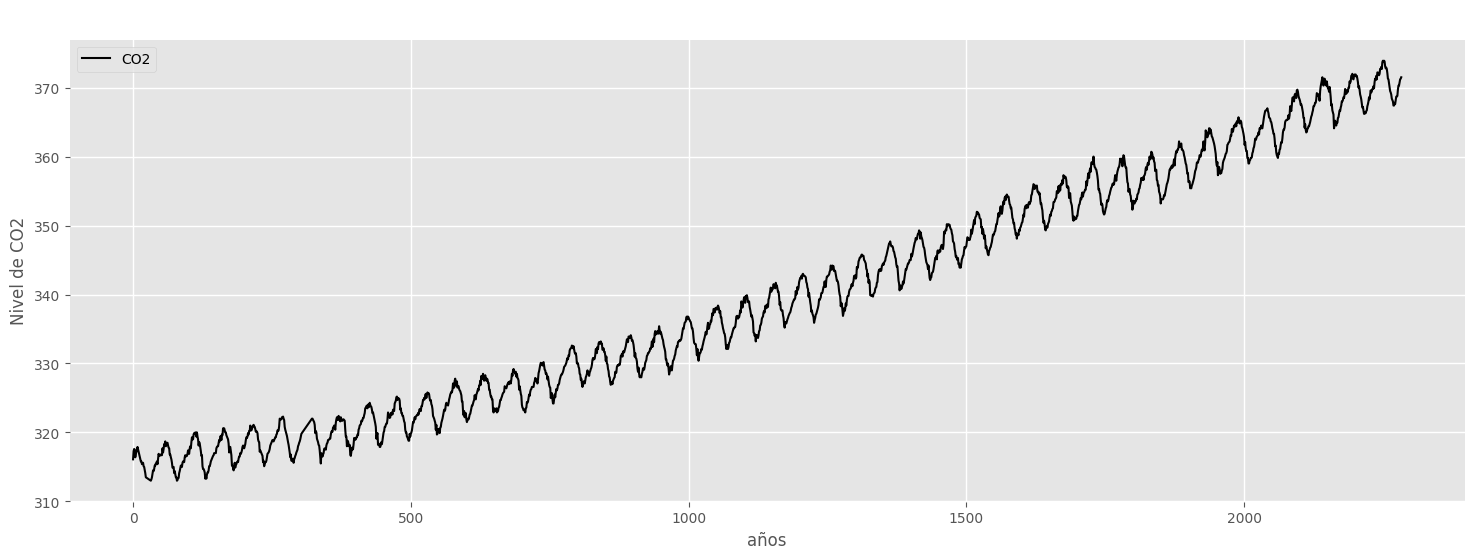

In [10]:
plt.style.use("ggplot")
plt.figure(figsize=(18,6))
plt.plot(co2["y"],color="black", label="CO2")

plt.title(" ", fontsize=20)
plt.xlabel('años')
plt.ylabel("Nivel de CO2")
plt.legend()
plt.show();

In [ ]:
sns.boxplot(co2["y"])
plt.title("Box Plot before Zero value imputation")
plt.show()

Ahora solo tienes las fechas y los valores de CO2. El paso interesante aquí es hacer ingeniería de características: crear variables adicionales, basadas en las variables originales. Aunque hay muy poca información en este conjunto de datos, hay muchas variables que puede crear a partir de él.

Comencemos por extraer variables estacionales de la variable de fecha. Como podemos ver en la gráfica, existe un fuerte patrón estacional. Podría intentar capturar esto agregando una estacionalidad mensual al modelo. Para esto, es necesario crear un mes variable en su conjunto de datos.

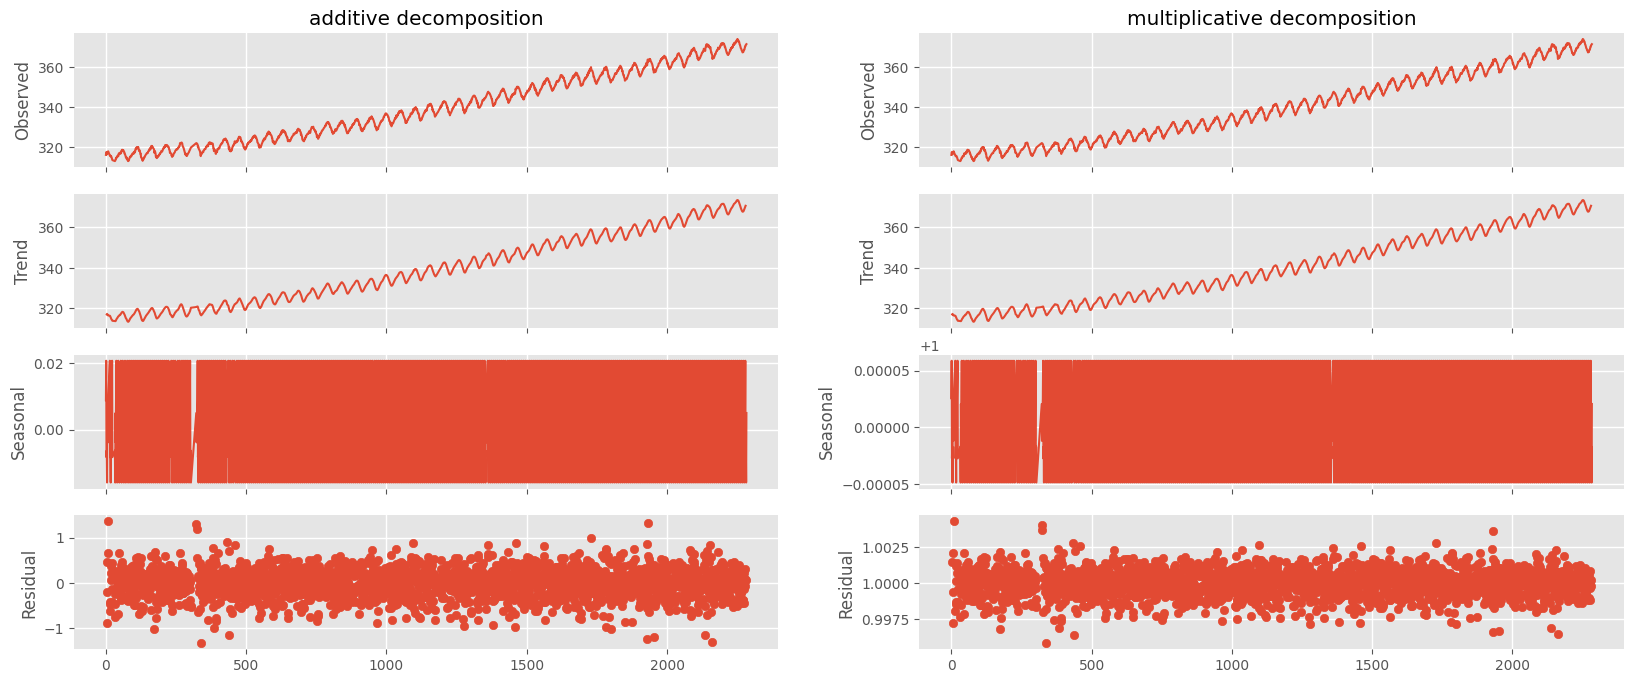

In [11]:
# perform seasonal decomposition
# we have daily data and from the plot above we see that one season lasts approx 1 year ~ 365 days 

fig, axes = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(20, 8))

for i,model in enumerate(['additive', 'multiplicative']):
    
    # Cambiar por la data que vamos a usar
    decomposition = sm.tsa.seasonal_decompose(co2["y"],period = 7, model=model) 
    decomposition.observed.plot(ax=axes[0,i], legend=False)
    
    axes[0,i].set_title(model + ' decomposition')
    
    axes[0,i].set_ylabel('Observed')
    decomposition.trend.plot(ax=axes[1,i], legend=False)
    axes[1,i].set_ylabel('Trend')
    decomposition.seasonal.plot(ax=axes[2,i], legend=False)
    axes[2,i].set_ylabel('Seasonal')
    #decomposition.resid.plot(ax=axes[3,i], legend=False)
    axes[3,i].scatter(np.array(decomposition.resid.index), decomposition.resid)
    axes[3,i].set_ylabel('Residual')
plt.show()

## Graficos de estacionalidades

In [12]:
df1=co2.copy()

In [13]:
df1

,ds,y,unique_id
0,1958-03-30,316.1,1
1,1958-04-06,317.3,1
2,1958-04-13,317.6,1
3,1958-04-20,317.5,1
4,1958-04-27,316.4,1
...,...,...,...
2279,2001-12-02,370.3,1
2280,2001-12-09,370.8,1
2281,2001-12-16,371.2,1
2282,2001-12-23,371.3,1


In [14]:
df1['month'] = co2['ds'].dt.month
df1['year'] = co2['ds'].dt.year

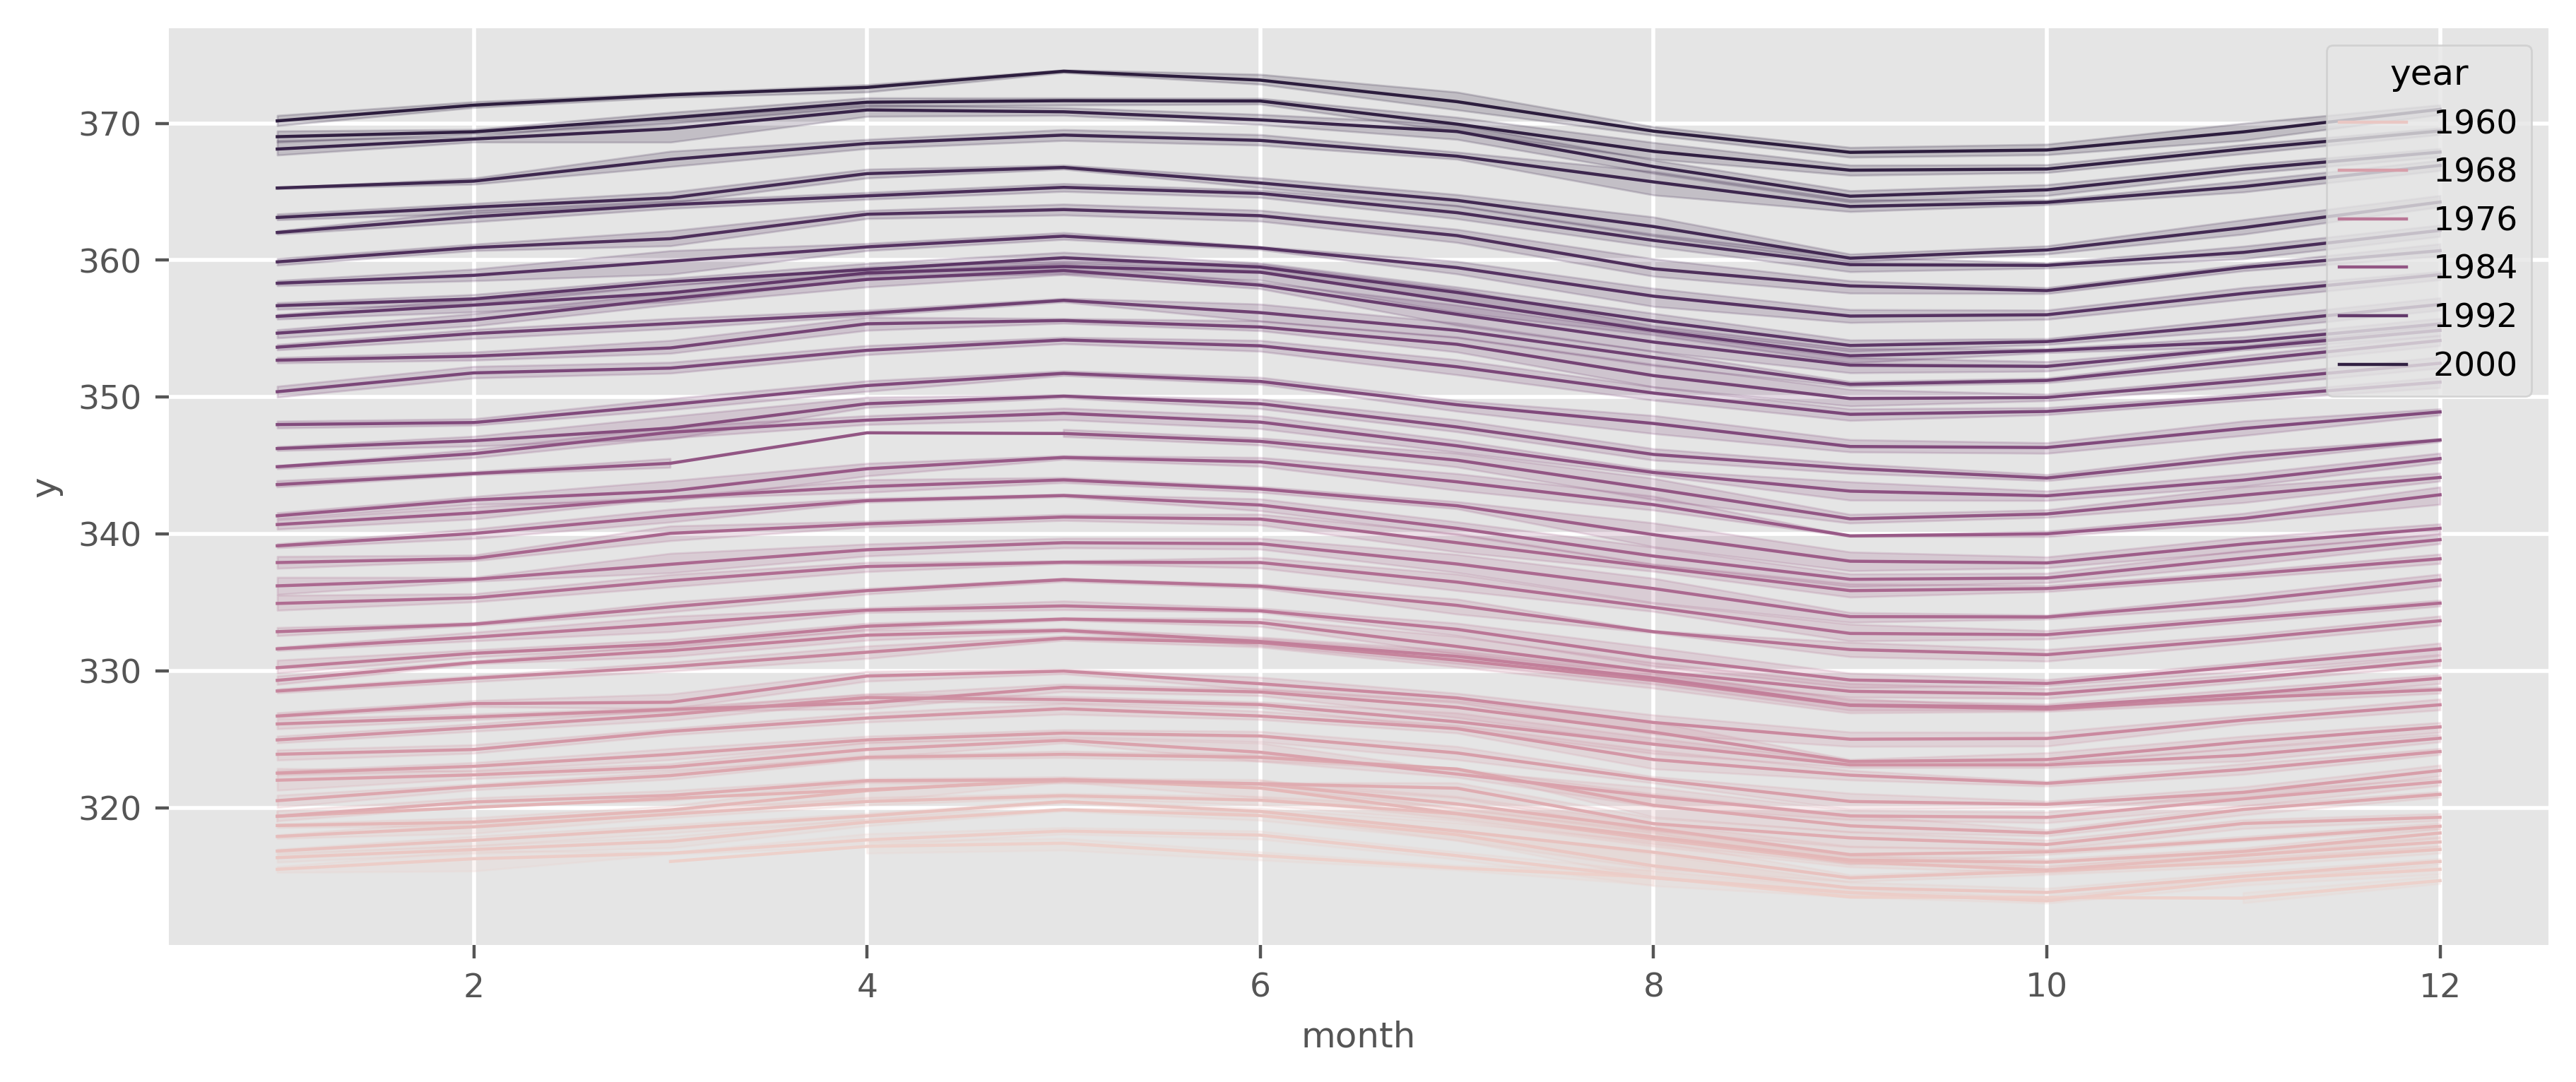

In [15]:
with plt.rc_context(rc = {'figure.dpi': 400, 'axes.labelsize': 9, 
                          'xtick.labelsize': 8.5, 'ytick.labelsize': 8.5,
                          'legend.fontsize': 8.5, 'legend.title_fontsize': 9}):

    fig, ax = plt.subplots(2, 1, figsize = (9, 7))
    
    sns.lineplot(ax = ax[0], x = df1['month'], y = df1['y'], 
                 hue = df1['year'],  linewidth = 0.8) # legend = 'full'
    
    ax[1].set_visible(False)
    
    plt.tight_layout(pad = 0.3)
    plt.show()

En el siguiente gráfico podemos analizar por meses el desempeño de cada año, en este caso podemos visualizar cada uno de los meses de cada uno de los años, como también podemos realizar un filtro por separado analizar algún mes en particular de los años.

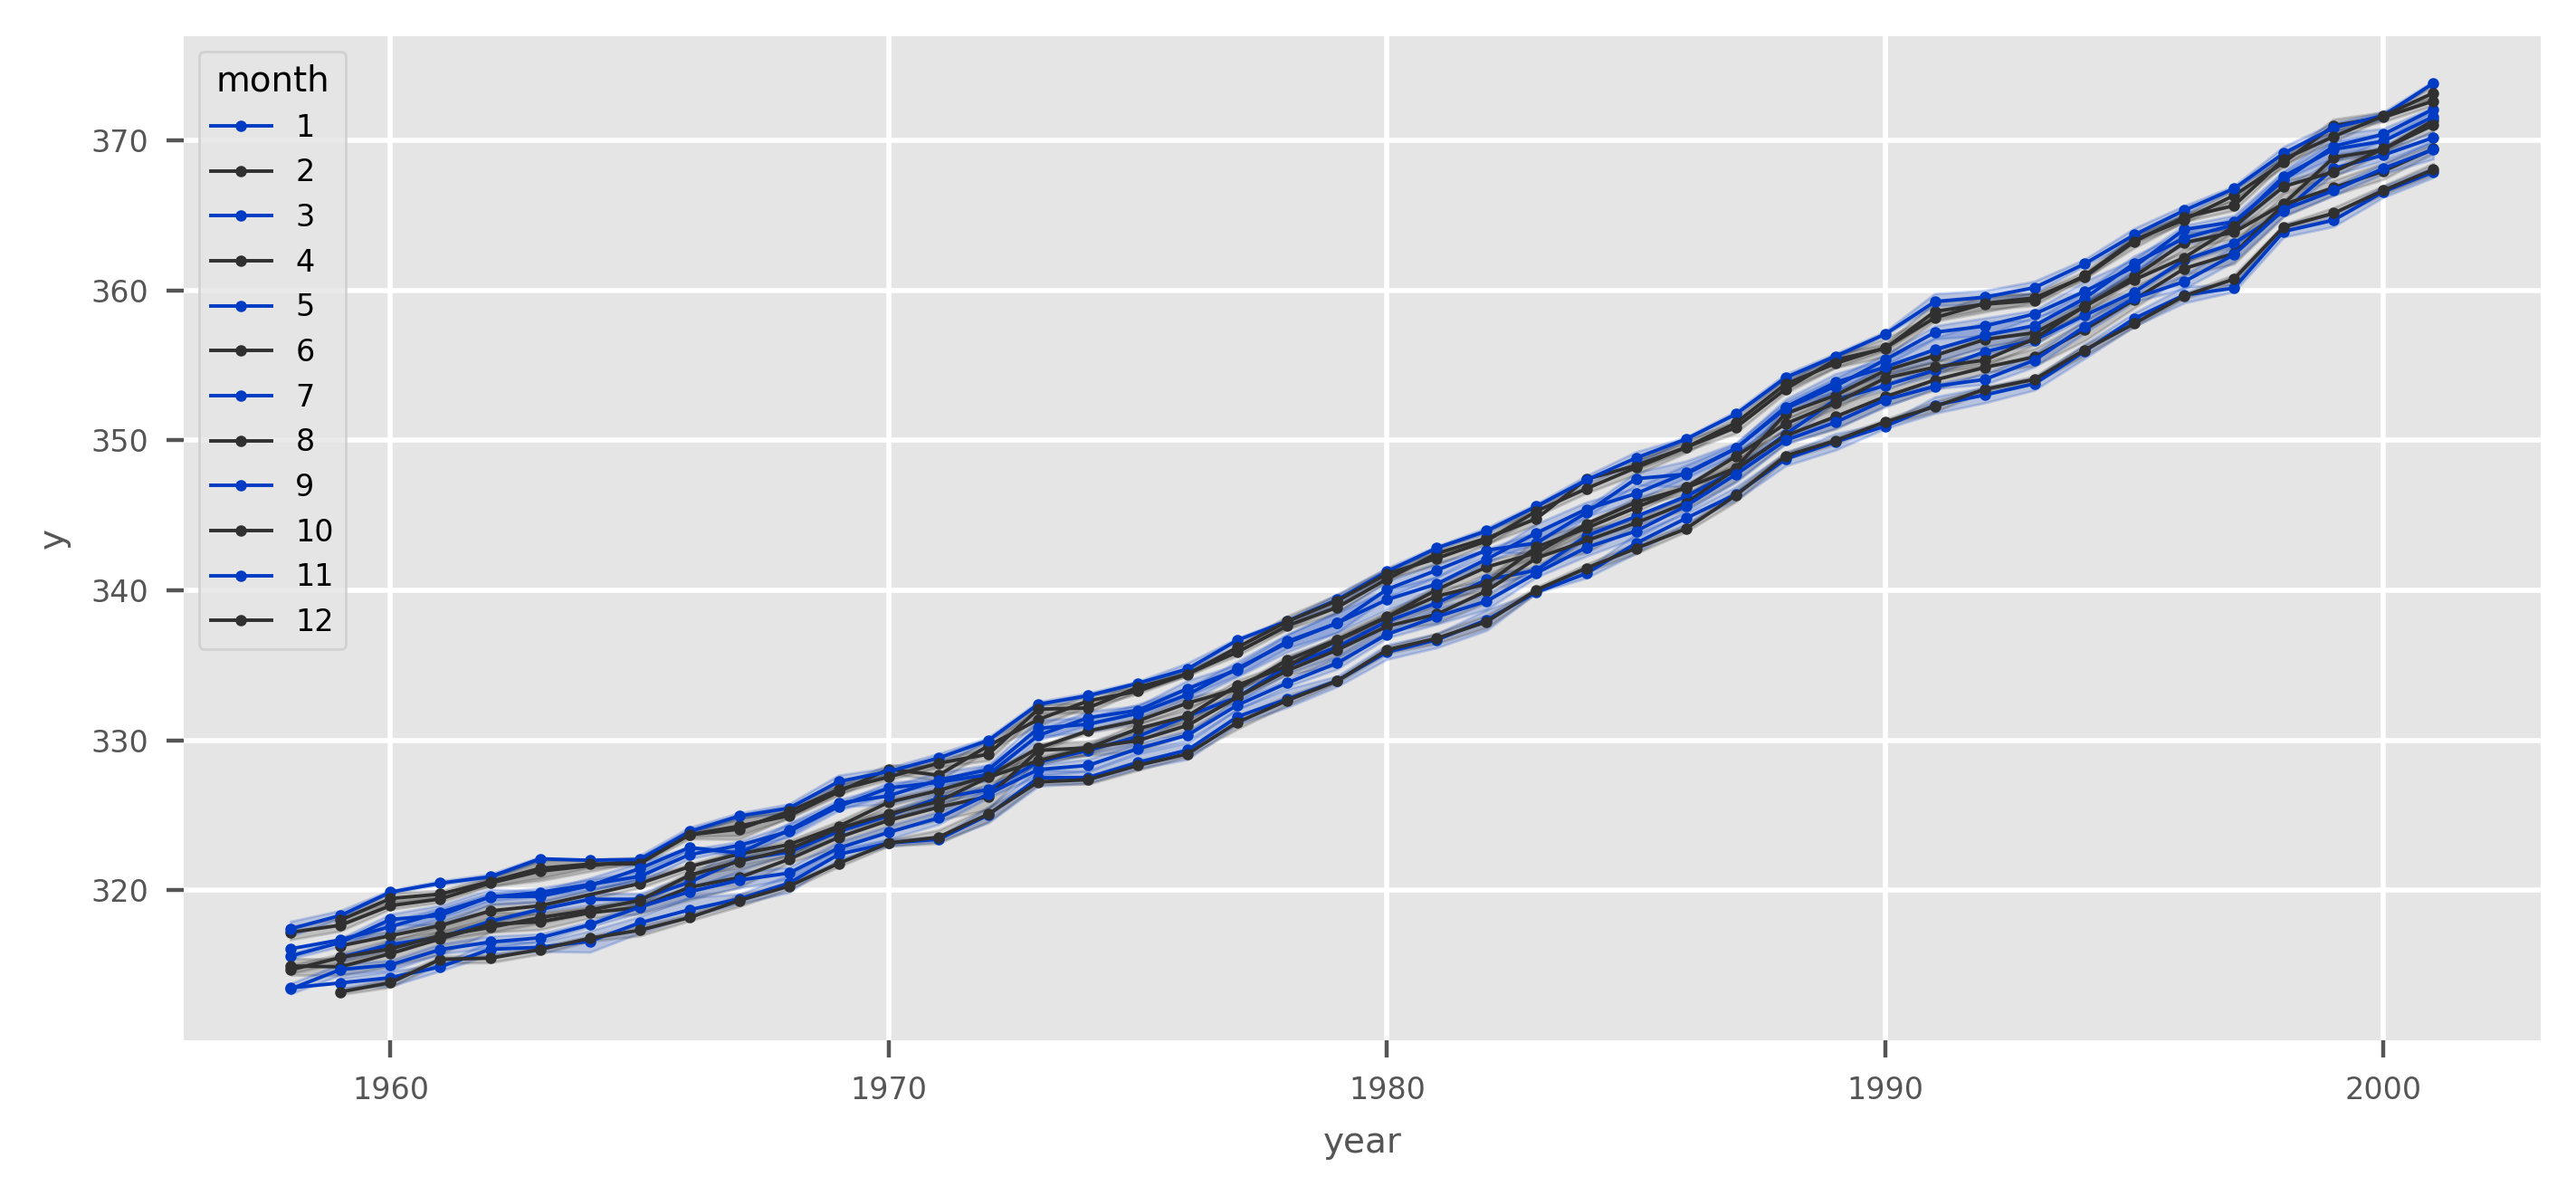

In [16]:
with plt.rc_context(rc = {'figure.dpi': 400, 'axes.labelsize': 7, 
                          'xtick.labelsize': 6, 'ytick.labelsize': 6, 
                          'legend.fontsize': 6, 'legend.title_fontsize': 7}):

    fig, ax = plt.subplots(2, 1, figsize = (7, 6))
    
    sns.lineplot(ax = ax[0], x = df1['year'], y = df1['y'],
                 hue = df1['month'], palette = ['#003bc4', '#303030'],
                 lw = 0.7, marker = 'o', markersize = 1.5, markeredgecolor = None)
        
    ax[1].set_visible(False)

    plt.tight_layout(pad = 0.3)
    plt.show()

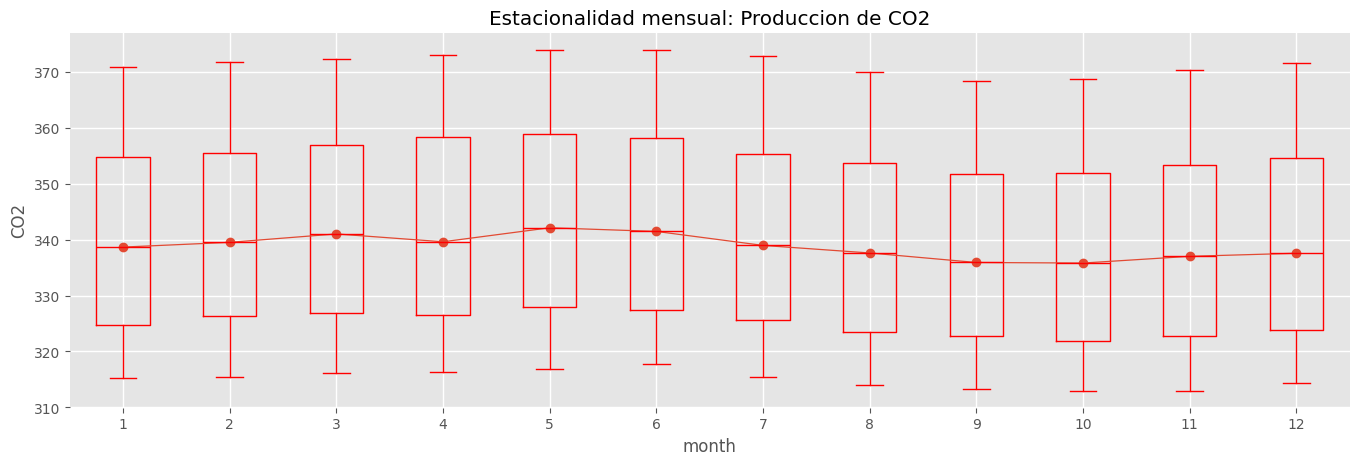

In [17]:
# Boxplot graph for monthly seasonality
# ==============================================================================
fig, ax = plt.subplots(figsize=(16, 5))
df1['month'] = df1['ds'].apply(lambda x: x.month)
df1.boxplot(column="y", by='month', ax=ax, color="red")
df1.groupby('month')["y"].median().plot(style='o-', linewidth=0.9, ax=ax)
ax.set_ylabel('CO2')
ax.set_title('Estacionalidad mensual: Produccion de CO2')
fig.suptitle('');
#plt.savefig("Gráfico de Barra-mes")

Ahora que tiene esta variable para la estacionalidad mensual, veamos si puede crear una variable que capture la tendencia alcista a largo plazo. La solución a este problema es agregar una variable año, extrayendo el año de la variable fecha. Como hay un aumento anual en los datos, esta variable podría capturar el efecto de la tendencia.

**Creando la variable año**

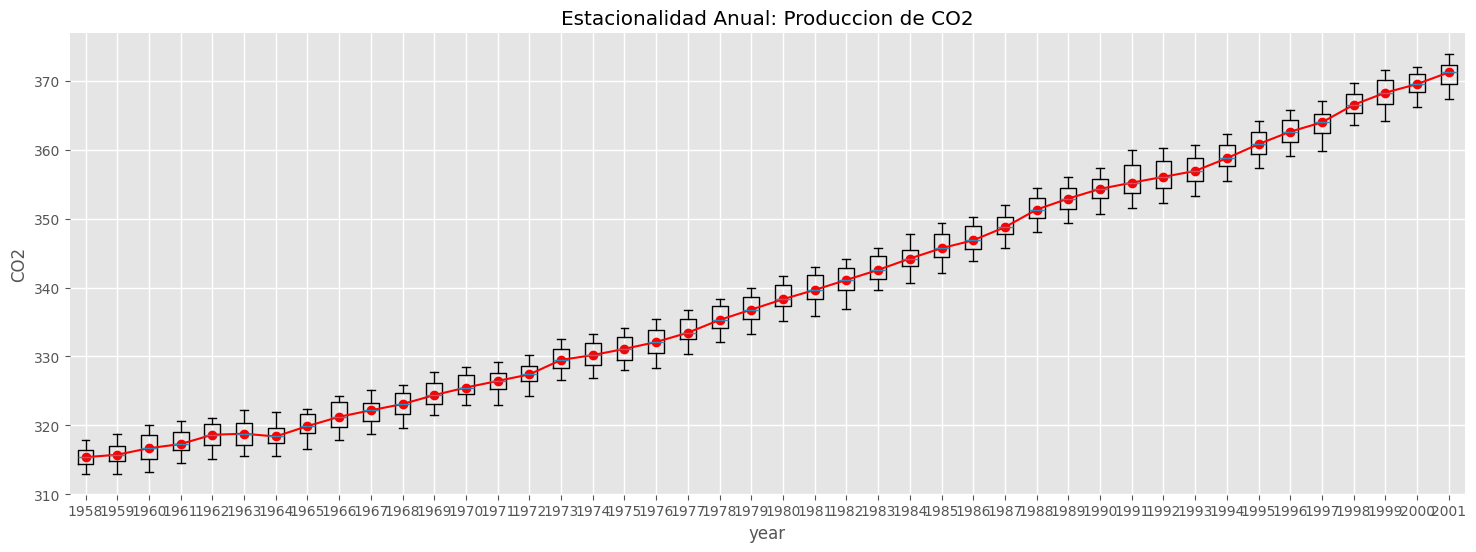

In [18]:
# Boxplot graph for annual seasonality
# ==============================================================================
# Extract year component from date
df1['year'] = co2['ds'].dt.year

# Create a dictionary to store the data for each year
data_anual = {}
for year in df1['year'].unique():
    data_anual[year] = df1.loc[df1['year'] == year, 'y'].values

# Create a data list for the Boxplot chart
boxplot_data = [data_anual[year] for year in sorted(data_anual.keys())]

# Create the Boxplot chart
plt.figure(figsize=(18, 6))
plt.boxplot(boxplot_data, labels=sorted(data_anual.keys()))
plt.xlabel('year')
plt.ylabel('CO2')
plt.title('Estacionalidad Anual: Produccion de CO2')

# Add the median line graph
medians = [np.median(data_anual[year]) for year in sorted(data_anual.keys())]
plt.plot(range(1, len(medians) + 1), medians, marker='o', color='red', linestyle='-')

plt.show()

## Graficos de Autocorrelacion

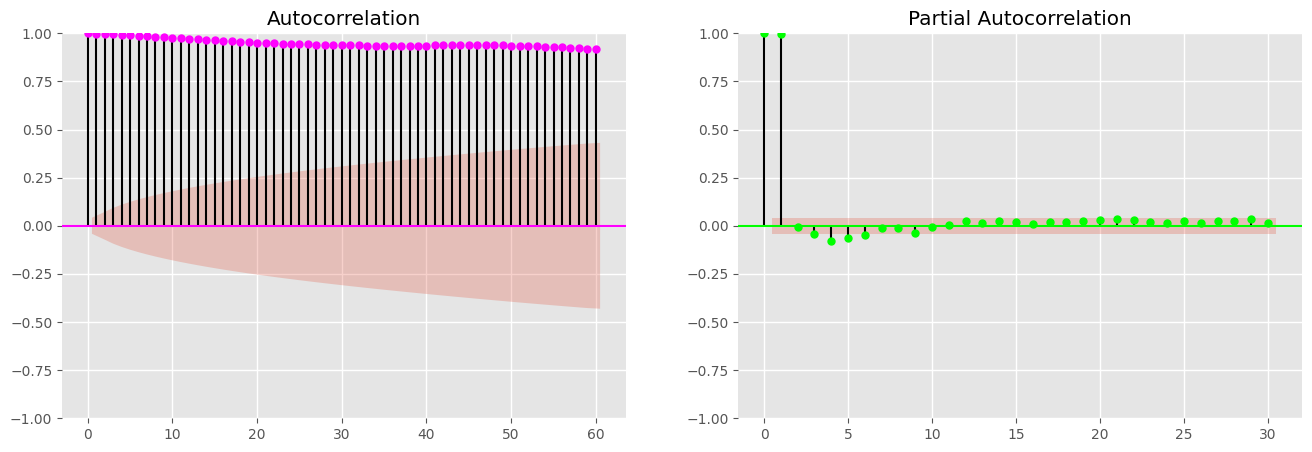

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

plot_acf(co2["y"],  lags=60, ax=axs[0],color="fuchsia")
axs[0].set_title("Autocorrelation");

# Grafico
plot_pacf(co2["y"],  lags=30, ax=axs[1],color="lime")
axs[1].set_title('Partial Autocorrelation')
plt.show()

## **Prueba Dickey Fuller Aumentada**
Una prueba de Dickey-Fuller aumentada (ADF) es un tipo de prueba estadística que determina si una raíz unitaria está presente en los datos de series de tiempo. Las raíces unitarias pueden provocar resultados impredecibles en el análisis de series temporales. Se forma una hipótesis nula en la prueba de raíz unitaria para determinar en qué medida una tendencia afecta los datos de series de tiempo. Al aceptar la hipótesis nula, aceptamos la evidencia de que los datos de la serie temporal no son estacionarios. Al rechazar la hipótesis nula o aceptar la hipótesis alternativa, aceptamos la evidencia de que los datos de la serie temporal se generan mediante un proceso estacionario. Este proceso también se conoce como tendencia estacionaria. Los valores del estadístico de prueba ADF son negativos. Los valores más bajos de ADF indican un rechazo más fuerte de la hipótesis nula.

La prueba Dickey-Fuller aumentada es una prueba estadística común que se utiliza para comprobar si una serie de tiempo determinada es estacionaria o no. Podemos lograr esto definiendo la hipótesis nula y alternativa.

- Hipótesis nula: la serie temporal no es estacionaria. Da una tendencia dependiente del tiempo.
- Hipótesis alternativa: la serie temporal es estacionaria. En otras palabras, la serie no depende del tiempo.

- Estadístico ADF o t < valores críticos: Rechaza la hipótesis nula, la serie temporal es estacionaria.
- Estadística ADF o t > valores críticos: No se pudo rechazar la hipótesis nula, la serie temporal no es estacionaria.

In [20]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Dickey-Fuller test results for columns: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of observations used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("The data is stationary")
    else:
        print("Conclusion:====>")
        print("The null hypothesis cannot be rejected")
        print("The data is not stationary")

In [21]:
Augmented_Dickey_Fuller_Test_func(co2["y"],'Produccion de CO2')

Dickey-Fuller test results for columns: Produccion de CO2
Test Statistic                    0.043965
p-value                           0.962020
No Lags Used                     27.000000
Number of observations used    2197.000000
Critical Value (1%)              -3.433330
Critical Value (5%)              -2.862856
Critical Value (10%)             -2.567471
dtype: float64
Conclusion:====>
The null hypothesis cannot be rejected
The data is not stationary


# **Modeling with MLForecast**

## **Construyendo el Modelo**

In [22]:
from numba import njit
from window_ops.expanding import expanding_mean
from window_ops.rolling import rolling_mean

from sklearn.base import BaseEstimator

## Construir el modelo de Regresión

In [23]:
class Naive(BaseEstimator):
    def fit(self, X, y):
        return self

    def predict(self, X):
        return X['lag1']

In [24]:
model = [LinearRegression(), Naive()]

In [25]:
mlf = MLForecast(models=model,
                 freq='W', 
                 lags=[1,2,3,4,5,6,7],
                 lag_transforms={1: [expanding_mean],24: [(rolling_mean, 7)] },
                 target_transforms=[Differences([1])], # Difenciado 
                 date_features=["year", "month", "day"] # Estacionalidad
                 ) 

In [26]:
prep = mlf.preprocess(co2)
prep

,ds,y,unique_id,lag1,lag2,lag3,lag4,lag5,lag6,lag7,expanding_mean_lag1,rolling_mean_lag24_window_size7,year,month,day
47,1959-02-22,-0.3,1,1.5,-0.4,0.2,0.1,0.3,0.0,0.5,0.026667,0.257143,1959,2,22
48,1959-03-01,0.0,1,-0.3,1.5,-0.4,0.2,0.1,0.3,0.0,0.016129,-0.214286,1959,3,1
49,1959-03-08,0.2,1,0.0,-0.3,1.5,-0.4,0.2,0.1,0.3,0.015625,-0.257143,1959,3,8
51,1959-03-22,-0.1,1,0.2,0.0,-0.3,1.5,-0.4,0.2,0.1,0.021212,-0.300000,1959,3,22
52,1959-03-29,0.0,1,-0.1,0.2,0.0,-0.3,1.5,-0.4,0.2,0.017647,-0.128571,1959,3,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2279,2001-12-02,0.0,1,0.6,0.9,0.1,0.0,0.6,0.5,-0.2,0.024425,0.014286,2001,12,2
2280,2001-12-09,0.5,1,0.0,0.6,0.9,0.1,0.0,0.6,0.5,0.024414,-0.114286,2001,12,9
2281,2001-12-16,0.4,1,0.5,0.0,0.6,0.9,0.1,0.0,0.6,0.024629,-0.171429,2001,12,16
2282,2001-12-23,0.1,1,0.4,0.5,0.0,0.6,0.9,0.1,0.0,0.024797,-0.228571,2001,12,23


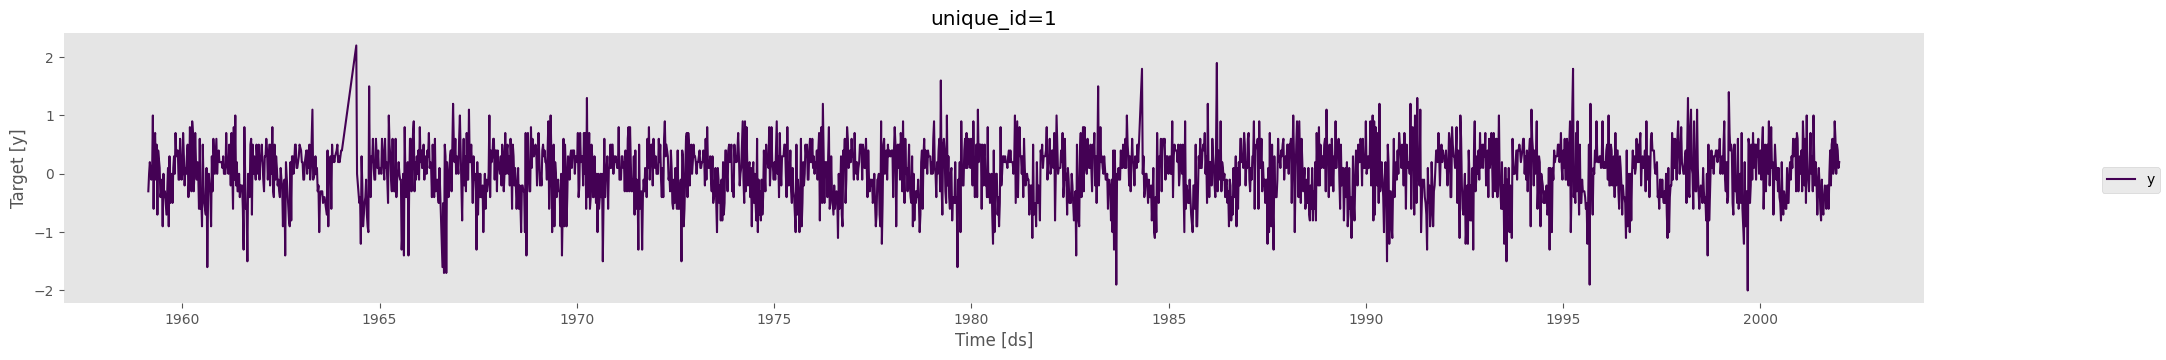

In [27]:
plot_series(prep)

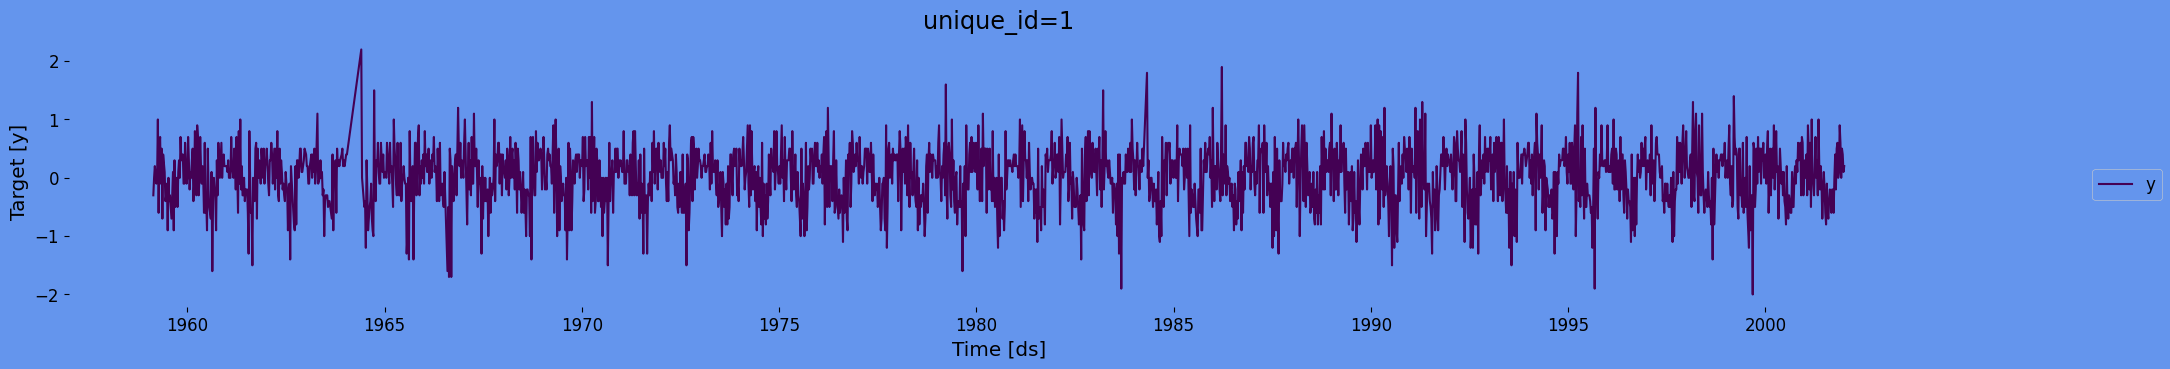

In [28]:
plt.rcParams.update(dark_style)
plot_series(prep)

## **Entrenando el Modelo**

In [29]:
# fit the models
mlf.fit(co2,  
 fitted=True, 
prediction_intervals=PredictionIntervals(n_windows=3, h=28, method="conformal_distribution"))

MLForecast(models=[LinearRegression, Naive], freq=W, lag_features=['lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag7', 'expanding_mean_lag1', 'rolling_mean_lag24_window_size7'], date_features=['year', 'month', 'day'], num_threads=1)

In [30]:
result=mlf.forecast_fitted_values()
result=result.set_index("unique_id")
result

,ds,y,LinearRegression,Naive
unique_id,,,,
1,1959-02-22,316.6,316.570470,318.4
1,1959-03-01,316.6,316.623298,316.3
1,1959-03-08,316.8,316.937417,316.6
1,1959-03-22,316.7,316.862599,317.0
1,1959-03-29,316.7,316.817060,316.6
...,...,...,...,...
1,2001-12-02,370.3,370.551383,370.9
1,2001-12-09,370.8,370.782129,370.3
1,2001-12-16,371.2,371.291153,371.3


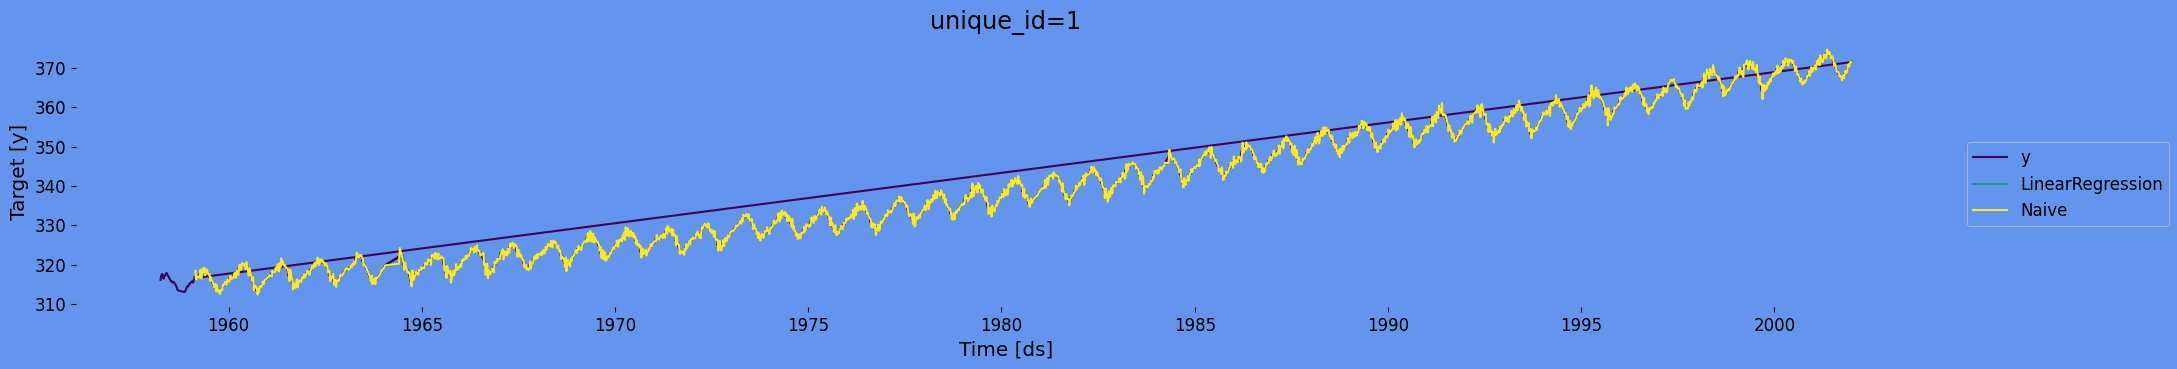

In [31]:
plot_series(co2, result.reset_index())

In [32]:
from statsmodels.stats.diagnostic import normal_ad
from scipy import stats

sw_result = stats.shapiro(result["LinearRegression"])
ad_result = normal_ad(np.array(result["LinearRegression"]), axis=0)
dag_result = stats.normaltest(result["LinearRegression"], axis=0, nan_policy='propagate')

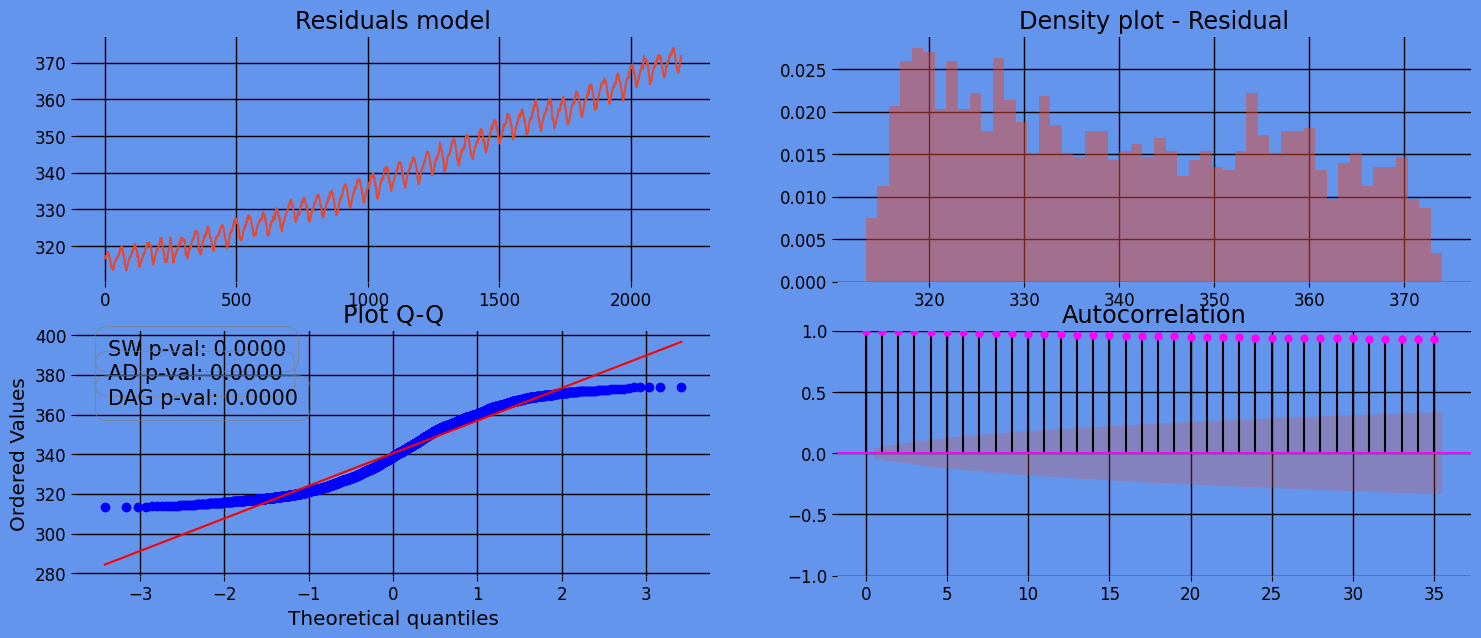

In [33]:
result=mlf.forecast_fitted_values()
fig, axs = plt.subplots(nrows=2, ncols=2)

# plot[1,1]
result["LinearRegression"].plot(ax=axs[0,0])
axs[0,0].set_title("Residuals model");

# plot
#plot(result["XGBRegressor"], ax=axs[0,1]);
axs[0,1].hist(result["LinearRegression"], density=True,bins=50, alpha=0.5 )
axs[0,1].set_title("Density plot - Residual");

# plot
stats.probplot(result["LinearRegression"], dist="norm", plot=axs[1,0])
axs[1,0].set_title('Plot Q-Q')
axs[1,0].annotate("SW p-val: {:.4f}".format(sw_result[1]), xy=(0.05,0.9), xycoords='axes fraction', fontsize=15,
            bbox=dict(boxstyle="round", fc="none", ec="gray", pad=0.6))

axs[1,0].annotate("AD p-val: {:.4f}".format(ad_result[1]), xy=(0.05,0.8), xycoords='axes fraction', fontsize=15,
            bbox=dict(boxstyle="round", fc="none", ec="gray", pad=0.6))

axs[1,0].annotate("DAG p-val: {:.4f}".format(dag_result[1]), xy=(0.05,0.7), xycoords='axes fraction', fontsize=15,
            bbox=dict(boxstyle="round", fc="none", ec="gray", pad=0.6))
# plot
plot_acf(result["LinearRegression"],  lags=35, ax=axs[1,1],color="fuchsia")
axs[1,1].set_title("Autocorrelation");

## **Predicciones del Modelo**

In [34]:
forecast_df = mlf.predict(h=28, level=[80,95]) 

forecast_df

,unique_id,ds,LinearRegression,Naive,LinearRegression-lo-95,LinearRegression-lo-80,LinearRegression-hi-80,LinearRegression-hi-95,Naive-lo-95,Naive-lo-80,Naive-hi-80,Naive-hi-95
0,1,2002-01-06,371.810664,371.7,371.584232,371.636887,371.984440,372.037095,371.3125,371.35,372.05,372.0875
1,1,2002-01-13,372.062766,371.9,371.721024,371.760817,372.364715,372.404508,370.8750,371.10,372.70,372.9250
2,1,2002-01-20,372.291802,372.1,371.715845,371.824346,372.759259,372.867760,370.5875,370.85,373.35,373.6125
3,1,2002-01-27,372.548967,372.3,371.617042,371.723758,373.374176,373.480892,370.4250,370.80,373.80,374.1750
4,1,2002-02-03,372.844383,372.5,371.867004,371.899513,373.789253,373.821762,369.9375,370.35,374.65,375.0625
5,1,2002-02-10,373.111653,372.7,371.801340,371.979767,374.243539,374.421967,369.7875,370.05,375.35,375.6125
6,1,2002-02-17,373.367014,372.9,371.467178,371.626108,375.107920,375.266850,368.9875,369.25,376.55,376.8125
7,1,2002-02-24,373.633574,373.1,371.498445,371.885067,375.382082,375.768704,369.3625,369.55,376.65,376.8375
8,1,2002-03-03,373.911939,373.3,371.649450,371.892156,375.931723,376.174428,369.3000,369.30,377.30,377.3000
9,1,2002-03-10,374.176810,373.5,371.682464,371.751676,376.601944,376.671157,368.6000,368.60,378.40,378.4000


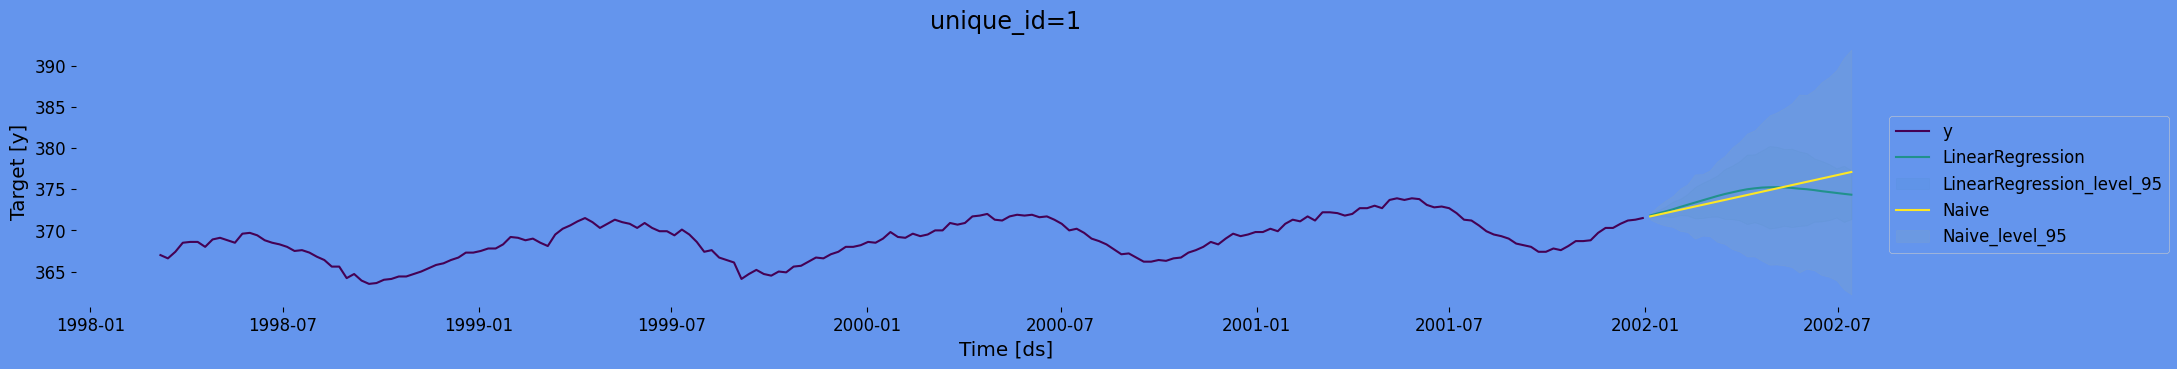

In [35]:
plot_series(co2, forecast_df, level=[95], max_insample_length=200,)

# **Evaluar el rendimiento del modelo.** <a class="anchor" id="7"></a>

[Table of Contents](#0.1)

En pasos anteriores, tomamos nuestros datos históricos para predecir el futuro. Sin embargo, para evaluar su precisión también nos gustaría saber cómo se habría comportado el modelo en el pasado. Para evaluar la precisión y solidez de sus modelos en sus datos, realice una "validación cruzada".

Con datos de series de tiempo, la "validación cruzada" se realiza definiendo una ventana deslizante a través de los datos históricos y prediciendo el período siguiente. Esta forma de "validación cruzada" nos permite llegar a una mejor estimación de las capacidades predictivas de nuestro modelo en una gama más amplia de instancias temporales y al mismo tiempo mantener los datos en el conjunto de entrenamiento contiguos como lo requieren nuestros modelos.

El siguiente gráfico muestra dicha estrategia de "validación cruzada":

![](https://raw.githubusercontent.com/Nixtla/statsforecast/main/nbs/imgs/ChainedWindows.gif)

## **Perform time series cross-validation**

Para obtener una estimación de qué tan bien será nuestro modelo al predecir datos futuros, podemos realizar una validación cruzada, que consiste en entrenar algunos modelos de forma independiente en diferentes subconjuntos de datos, usarlos para predecir un conjunto de validación y medir su desempeño.

Dado que nuestros datos dependen del tiempo, hacemos nuestras divisiones eliminando las últimas partes de la serie y usándolas como conjuntos de validación. Este proceso se implementa en `MLForecast.cross_validation`.

La "validación cruzada" de modelos de series temporales se considera una buena práctica, pero la mayoría de las implementaciones son muy lentas. La biblioteca `MlForecast` implementa la validación cruzada como una operación distribuida, lo que hace que el proceso requiera menos tiempo. Si tiene grandes conjuntos de datos, también puede realizar una "validación cruzada" en un clúster distribuido utilizando "Ray, Dask o Spark".

Dependiendo de su computadora, este paso debería tomar alrededor de 1 minuto.

El método `cross_validation` de la clase StatsForecast toma los siguientes argumentos.

* `df:` marco de datos de entrenamiento

* `h (int):` representa h pasos hacia el futuro que se están pronosticando. En este caso, con 12 meses de antelación.

* `step_size (int):` tamaño del paso entre cada ventana. En otras palabras: con qué frecuencia desea ejecutar los procesos de previsión.

* `n_windows(int):` número de ventanas utilizadas para la `validación cruzada`. En otras palabras: ¿cuántos procesos de previsión en el pasado desea evaluar?

In [36]:
cv_result = mlf.cross_validation(
    co2,
    n_windows=5,  # number of models to train/splits to perform
    h=28,  
)

In [37]:
cv_result

,unique_id,ds,cutoff,y,LinearRegression,Naive
0,1,1999-05-02,1999-04-25,370.8,370.591692,369.6
1,1,1999-05-09,1999-04-25,371.3,370.520886,368.9
2,1,1999-05-16,1999-04-25,371.0,370.286406,368.2
3,1,1999-05-23,1999-04-25,370.8,370.118211,367.5
4,1,1999-05-30,1999-04-25,370.3,369.935758,366.8
...,...,...,...,...,...,...
135,1,2001-12-02,2001-06-17,370.3,371.927661,365.6
136,1,2001-12-09,2001-06-17,370.8,372.145461,365.3
137,1,2001-12-16,2001-06-17,371.2,372.389128,365.0
138,1,2001-12-23,2001-06-17,371.3,372.645213,364.7


## **Evaluando el Modelo** <a class="anchor" id="8"></a>

[Table of Contents](#0.1)

Ahora podemos calcular la precisión del pronóstico utilizando una métrica de precisión adecuada. Aquí usaremos el error cuadrático medio (RMSE). Para hacer esto, primero necesitamos "instalar datasetsforecast", una biblioteca de Python desarrollada **por Nixtla** que incluye una función para calcular el RMSE.

`pip install datasetsforecast`

In [38]:
from datasetsforecast.losses import mse, mae, rmse

def evaluate_cross_validation(df, metric):
    models = df.drop(columns=['ds', 'cutoff', 'y']).columns.tolist()
    evals = []
    for model in models:
        eval_ = df.groupby(['unique_id', 'cutoff']).apply(lambda x: metric(x['y'].values, x[model].values)).to_frame() # Calculate loss for every unique_id, model and cutoff.
        eval_.columns = [model]
        evals.append(eval_)
    evals = pd.concat(evals, axis=1)
    evals = evals.groupby(['unique_id']).mean(numeric_only=True) # Averages the error metrics for all cutoffs for every combination of model and unique_id
    evals['best_model'] = evals.idxmin(axis=1)
    return evals

In [39]:
evaluation_df = evaluate_cross_validation(cv_result.set_index("unique_id"), rmse)

evaluation_df

,LinearRegression,Naive,best_model
unique_id,,,
1,2.107702,6.280953,LinearRegression


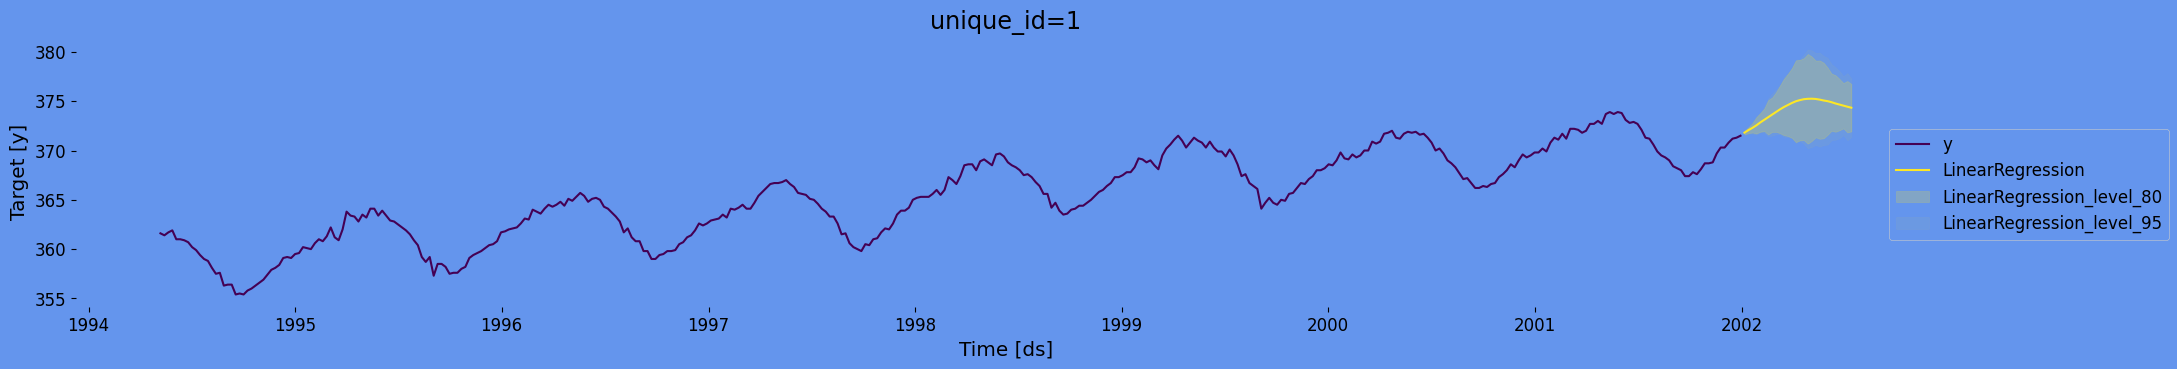

In [42]:
plot_series(co2, forecast_df, max_insample_length=400, level=[80, 95], models= ["LinearRegression"])

# Conslusión

Analizando los resultados del pronóstico de CO2 con diferentes modelos, podemos observar los siguientes valores para la métrica del error cuadrático medio (RMSE):

- LinearRegression: 2.107702
- Naive: 6.280953

El RMSE es una medida comúnmente utilizada para evaluar la precisión de los modelos de pronóstico. Representa la raíz cuadrada del promedio de los errores al cuadrado entre los valores pronosticados y los valores reales. Cuanto menor sea el valor del RMSE, mayor será la precisión del modelo de pronóstico.

En este caso, podemos observar que el modelo de regresión lineal (LinearRegression) obtuvo el valor más bajo de RMSE, con 2.107702. Esto indica que, en promedio, los pronósticos generados por este modelo tienen un error cuadrático medio bajo en comparación con los valores reales de CO2. Un valor de RMSE tan bajo sugiere que el modelo de regresión lineal es capaz de ajustarse bien a los datos y realizar predicciones precisas.

Por otro lado, el modelo "Naive" obtuvo un valor de RMSE de 6.280953. El enfoque "Naive" es un método simple que asume que los valores futuros serán iguales a los valores actuales. Este valor de RMSE más alto indica que este modelo presenta una precisión inferior en comparación con el modelo de regresión lineal.

No se proporcionan detalles sobre el "best_model", por lo que no es posible realizar una comparación directa con los otros modelos en términos de su rendimiento en el pronóstico de CO2.

En general, al analizar los resultados, se observa que el modelo de regresión lineal tiene un mejor desempeño en términos de precisión de pronóstico, ya que su RMSE es significativamente más bajo que el del enfoque "Naive". Sin embargo, es importante tener en cuenta que este análisis se basa únicamente en la métrica del RMSE y no proporciona una imagen completa del rendimiento del modelo en otras métricas o en diferentes contextos. Es recomendable realizar una evaluación más exhaustiva considerando múltiples métricas y teniendo en cuenta las características específicas del problema y los datos disponibles.